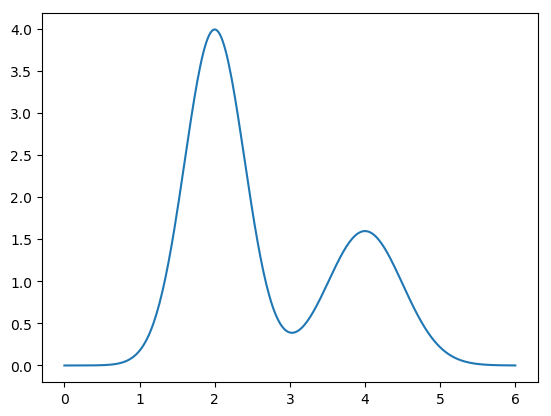

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x188b1c358>

In [1]:
using PyCall
include("src/gauss_error.jl")
include("src/kernels.jl")

a = 0.
b = 6.

function phi(x::Float64)
    mu1 = 2.
    mu2 = 4.
    n1 = 4.
    n2 = 2.
    sig1 = 0.4
    sig2 = 0.5

    norm(n, mu, sig, x) = n / sqrt(2 * pi*sig^2) * exp(-(x - mu)^2 / (2 * sig^2))
    return norm(n1, mu1, sig1, x) + norm(n2, mu2, sig2, x)
end

x = collect(range(a, stop=b, length=300))

using PyPlot
myplot = plot(x, phi.(x))

In [2]:
kernel_name = "triangular"

function kernel(x::Float64, y::Float64)
    return getOpticsKernels(kernel_name)(x, y)
end

kernel (generic function with 1 method)

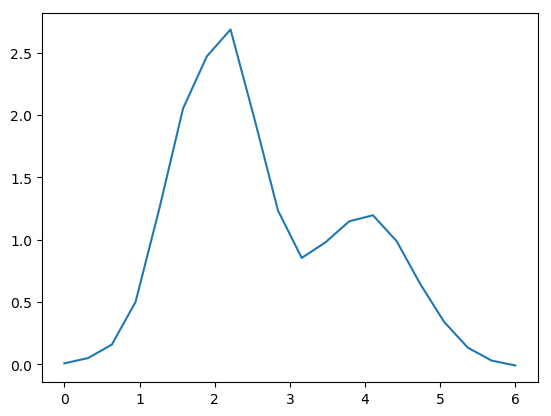

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x199919400>

In [3]:
convolution = y -> quadgk(x -> kernel(x,y) * phi(x), a, b, rtol=10^-5, maxevals=10^7)[1]
y = collect(range(a, stop=b, length=20))
ftrue = convolution.(y)
sig = 0.05*ftrue + [0.01 for i = 1:Base.length(ftrue)]
using Compat, Random, Distributions
noise = []
for sigma in sig
    n = rand(Normal(0., sigma), 1)[1]
    push!(noise, n)
end
f = ftrue + noise
plot(y, f)

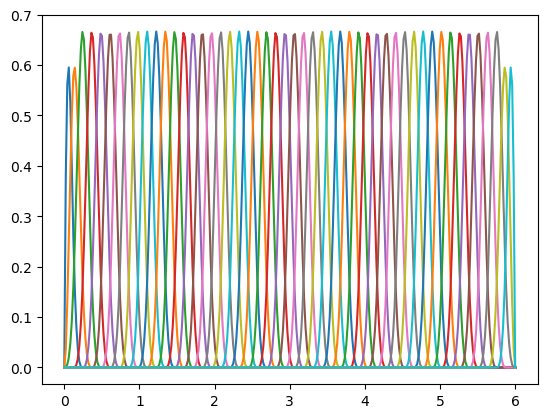

50


In [4]:
knots = collect(range(a, b, length=50))
basis = CubicSplineBasis(knots, ("dirichlet", "dirichlet"))
for basis_function in basis.basis_functions
    plot(x, basis_function.f.(x))
end
println(length(basis))

50omega[i, j] = 0 !!!
omega[i, j] = 0 !!!
omega[i, j] = 0 !!!
omega[i, j] = 0 !!!

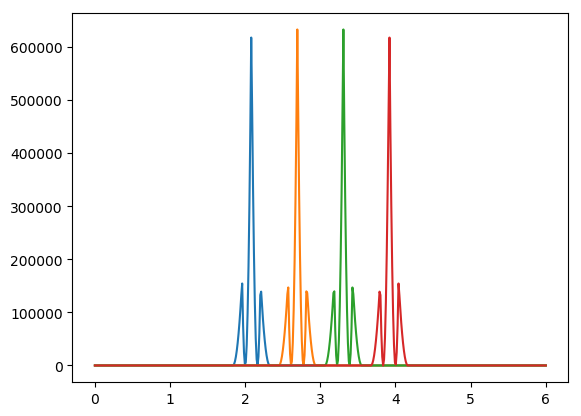

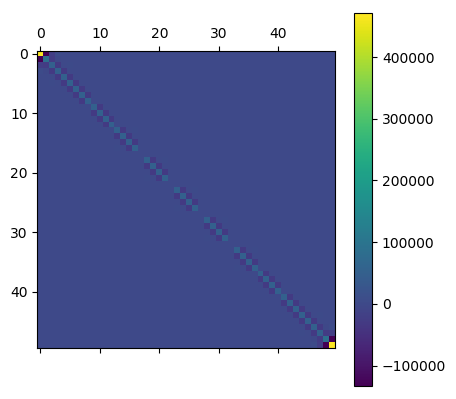

PyObject <matplotlib.colorbar.Colorbar object at 0x199a1ccc0>

In [5]:
print(length(basis))
my_omega = omega(basis, 2)[1]
# for i = 1:size(my_omega)[1]
#     for j = 1:size(my_omega)[1]
#         my_omega[i, j] = abs(my_omega[i, j])
#     end
# end
matshow(my_omega)
colorbar()

In [6]:
model = GaussErrorUnfolder(basis, omega(basis, 2))

GaussErrorUnfolder(CubicSplineBasis(0.0, 6.0, [0.0, 0.0, 0.0, 0.0, 0.122449, 0.244898, 0.367347, 0.489796, 0.612245, 0.734694  …  5.26531, 5.38776, 5.5102, 5.63265, 5.7551, 5.87755, 6.0, 6.0, 6.0, 6.0], Any[BaseFunction(BSpline(1, 3, [0.0, 0.0, 0.0, 0.0, 0.122449, 0.244898, 0.367347, 0.489796, 0.612245, 0.734694  …  5.26531, 5.38776, 5.5102, 5.63265, 5.7551, 5.87755, 6.0, 6.0, 6.0, 6.0], ##41#43{Int64,Int64,Array{Float64,1}}(1, 3, [0.0, 0.0, 0.0, 0.0, 0.122449, 0.244898, 0.367347, 0.489796, 0.612245, 0.734694  …  5.26531, 5.38776, 5.5102, 5.63265, 5.7551, 5.87755, 6.0, 6.0, 6.0, 6.0], Box(#b_spline_function#42(Box(#= circular reference @-2 =#))))), (0.0, 6.0)), BaseFunction(BSpline(2, 3, [0.0, 0.0, 0.0, 0.0, 0.122449, 0.244898, 0.367347, 0.489796, 0.612245, 0.734694  …  5.26531, 5.38776, 5.5102, 5.63265, 5.7551, 5.87755, 6.0, 6.0, 6.0, 6.0], ##41#43{Int64,Int64,Array{Float64,1}}(2, 3, [0.0, 0.0, 0.0, 0.0, 0.122449, 0.244898, 0.367347, 0.489796, 0.612245, 0.734694  …  5.26531, 5.38776, 

In [7]:
phi_reconstruct = solve(model, kernel, f, sig, y)

starting solve
ending solve
starting solve
ending solve
starting solve_correct
starting optimal_alpha
starting optimize
det(BaO) = 0


SingularException: SingularException(18)

In [8]:
phivec = PhiVec(phi_reconstruct["coeff"], basis, phi_reconstruct["sig"])
println()

UndefVarError: UndefVarError: phi_reconstruct not defined

In [9]:
using PyPlot

plot(x, phi.(x))
# title(kernel_name + "kernel")
phi_reconstructed = call(phivec, x)
phi_reconstructed_errors = errors(phivec, x)

plot(x, phi_reconstructed)
print(phi_reconstructed)
print(typeof(x), typeof(phi_reconstructed))
print(length(x), length(phi_reconstructed))
fill_between(x, phi_reconstructed - phi_reconstructed_errors, phi_reconstructed + phi_reconstructed_errors, alpha=0.3)

UndefVarError: UndefVarError: phivec not defined

In [10]:
matshow(reshape(map(x->abs(x), phi_reconstruct["coeff"]), (1, length(basis))))
colorbar()

UndefVarError: UndefVarError: phi_reconstruct not defined

In [11]:
basis_functions = basis.basis_functions
z = collect(range(a, b, length=500))
my_sum = zeros(length(z))
for i = 1:length(basis_functions)
    basis_function = basis_functions[i]
    coeff = phi_reconstruct["coeff"][i]
    plot(z, coeff * basis_function.f.(z))
    my_sum += coeff * basis_function.f.(z)
#     plot(z, basis_function.f.(z))
end
# plot(z, phi.(z), "r")
plot(z, my_sum, "b")
print(phi_reconstruct["coeff"])

UndefVarError: UndefVarError: phi_reconstruct not defined

50
0.0
46
(

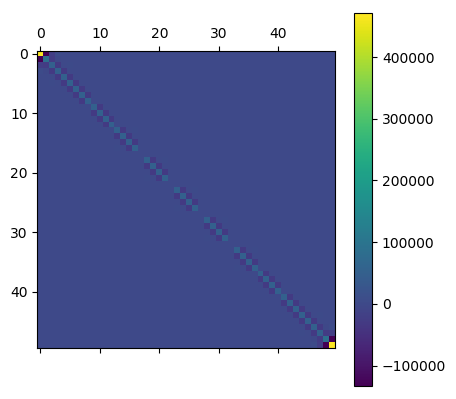

50, 50)
18
23
28
33


In [12]:
println(length(basis))
my_omega = omega(basis, 2)[1]
# for i = 1:size(phi_reconstruct["sig"])[1]
#     for j = 1:size(phi_reconstruct["sig"])[1]
#         if i == j
#             println(phi_reconstruct["sig"][i, j])
#         end
#         phi_reconstruct["sig"][i, j] = abs(phi_reconstruct["sig"][i, j])
#     end
# end
# matshow(phi_reconstruct["sig"])
matshow(my_omega)
colorbar()
println(det(my_omega))
println(rank(my_omega))
println(size(my_omega))
for i  = 1:size(my_omega)[1]
    for j  = 1:size(my_omega)[1]
#         println(i)
        if my_omega[i, j] == 0 && i == j
            println(i)
        end
    end
end

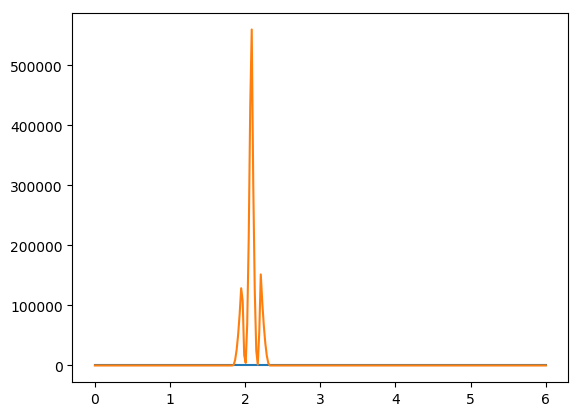

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x19a69c160>

In [13]:
plot(x, basis.basis_functions[18].f.(x))
plot(x, [derivative(basis.basis_functions[18].f, x0, 2)^2 for x0 in x])

In [14]:
my_omega[18, 18]

0.0

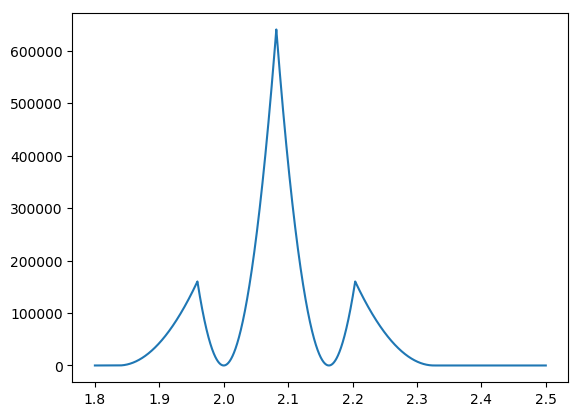

integrate from 1.8 to 2.5: (52288.44521709691, 0.000343852536646554)
integrate from 0. to 6.: (0.0, 0.0)
integrate from 0. to 1.8: (0.0, 0.0)
integrate from 2.5 to 6.: (0.0, 0.0)


In [18]:
i = 18
j = 18
deg = 2
a = 1.8
b = 2.5
p = collect(range(a, b, length=50000))
funct = qwe::Float64 -> derivative(basis.basis_functions[i].f, qwe, deg)*derivative(basis.basis_functions[j].f, qwe, deg)
plot(p, funct.(p))
res = quadgk(funct, a, b)
println("integrate from 1.8 to 2.5: ", res)

res = quadgk(funct, 0., 6.)
println("integrate from 0. to 6.: ", res)

res = quadgk(funct, 0., 1.8)
println("integrate from 0. to 1.8: ", res)
res = quadgk(funct, 2.5, 6.)
println("integrate from 2.5 to 6.: ", res)